# Human Activity Recognition Using Mobile Sensor Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Data_HAR.csv')
data.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [3]:
data.shape

(31991, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [5]:
data.isnull().sum()

accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64

In [6]:
data.duplicated().sum()

144

In [7]:
data[data.duplicated(keep=False)].sort_values('timestamp')

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
19223,-0.523911,3.544629,8.587043,0.206907,-0.206078,0.118522,04:03.5,1
19544,-0.523911,3.544629,8.587043,0.206907,-0.206078,0.118522,04:03.5,1
19545,-0.948278,3.616779,9.574091,-0.081989,-0.193955,-0.180430,04:03.6,1
19224,-0.948278,3.616779,9.574091,-0.081989,-0.193955,-0.180430,04:03.6,1
19225,-0.579744,3.490591,8.026459,-0.821895,-0.253450,-0.542457,04:03.7,1
...,...,...,...,...,...,...,...,...
19364,-1.347797,3.003654,11.049572,0.241130,0.072481,0.376511,04:17.6,1
19686,-1.026266,2.315984,9.469608,0.114167,0.132924,0.192084,04:17.7,1
19365,-1.026266,2.315984,9.469608,0.114167,0.132924,0.192084,04:17.7,1
19366,-0.862506,1.566642,7.964637,0.008722,0.054945,0.141892,04:17.8,1


In [8]:
data=data.drop_duplicates().reset_index(drop=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31847 entries, 0 to 31846
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31847 non-null  float64
 1   accY       31847 non-null  float64
 2   accZ       31847 non-null  float64
 3   gyroX      31847 non-null  float64
 4   gyroY      31847 non-null  float64
 5   gyroZ      31847 non-null  float64
 6   timestamp  31847 non-null  object 
 7   Activity   31847 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.9+ MB


In [11]:
def convert_to_seconds(timestamp):
    try:
        minutes, seconds = timestamp.split(':')
        seconds = float(seconds)
        total_seconds = int(minutes) * 60 + seconds
        return total_seconds
    except ValueError:
        return None

data['timestamp_seconds'] = data['timestamp'].apply(convert_to_seconds)

In [12]:
data.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity,timestamp_seconds
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1,2062.9
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1,2063.0
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1,2063.1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1,2063.2
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1,2063.3


In [13]:
# Dropping rows with invalid timestamps
data = data.dropna(subset=['timestamp_seconds']).reset_index(drop=True)

# Dropping original timestamp column
data = data.drop(columns=['timestamp'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31846 entries, 0 to 31845
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accX               31846 non-null  float64
 1   accY               31846 non-null  float64
 2   accZ               31846 non-null  float64
 3   gyroX              31846 non-null  float64
 4   gyroY              31846 non-null  float64
 5   gyroZ              31846 non-null  float64
 6   Activity           31846 non-null  int64  
 7   timestamp_seconds  31846 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.9 MB


In [15]:
data.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity,timestamp_seconds
count,31846.000000,31846.000000,31846.000000,31846.000000,31846.000000,31846.000000,31846.000000,31846.000000
mean,0.026171,2.152622,9.538041,-0.004460,-0.014738,-0.007107,0.982101,1916.325422
std,0.741472,1.086707,2.056579,0.307736,0.249249,0.266295,0.132585,1103.511252
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000,0.000000
25%,-0.469537,1.409506,7.794030,-0.149788,-0.162519,-0.154353,1.000000,959.000000
50%,-0.021705,2.117572,9.407412,0.022291,-0.011075,0.005096,1.000000,1985.050000
75%,0.479453,2.927088,11.158695,0.177924,0.124858,0.152067,1.000000,2884.275000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000,3599.900000


In [16]:
data['Activity'].value_counts()

Activity
1    31276
0      570
Name: count, dtype: int64

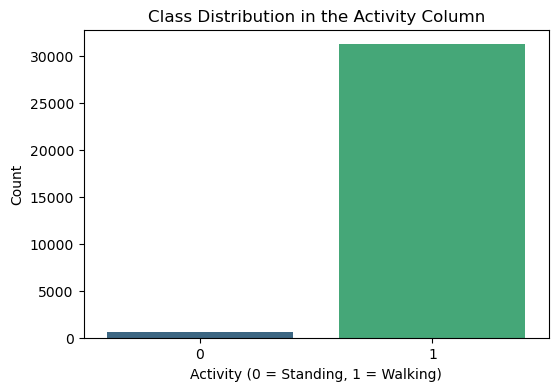

In [17]:
activity_counts = data['Activity'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.title("Class Distribution in the Activity Column")
plt.xlabel("Activity (0 = Standing, 1 = Walking)")
plt.ylabel("Count")
plt.show()

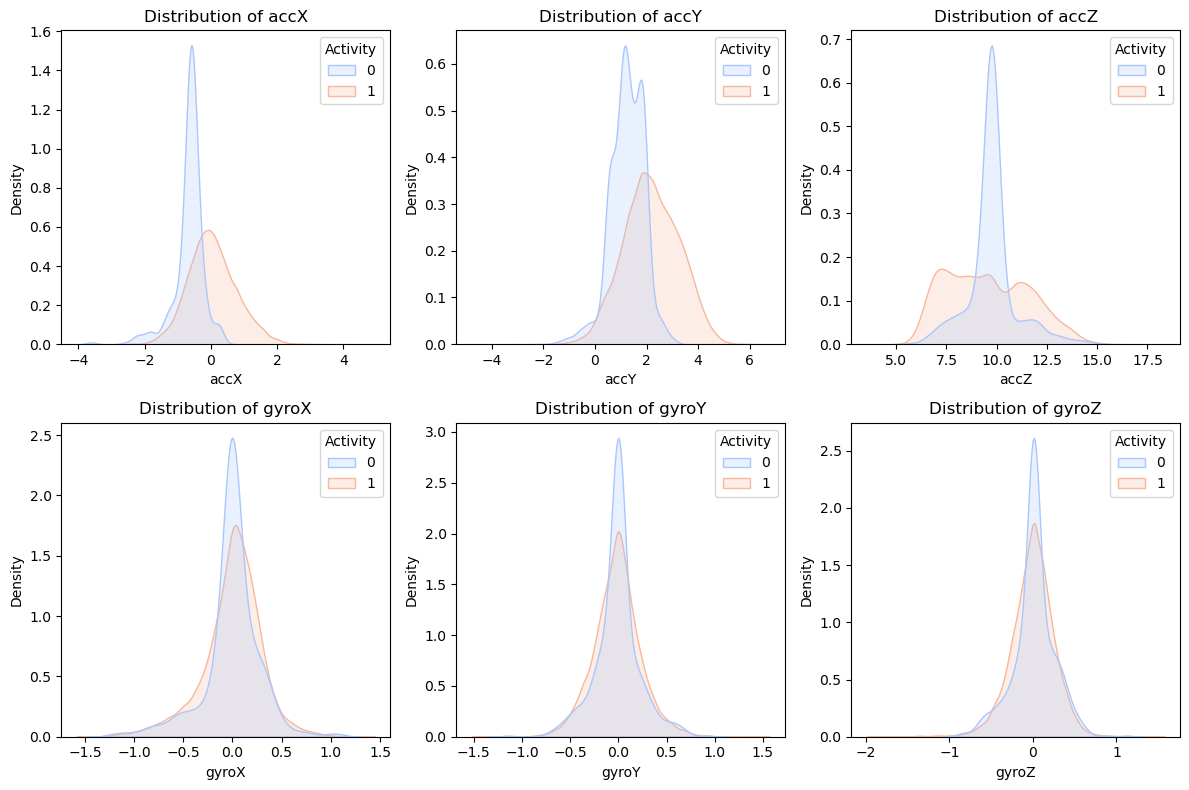

In [18]:
# Plotting distributions of accelerometer and gyroscope data for each activity
sensor_columns = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']

plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=data, x=col, hue="Activity", fill=True, common_norm=False, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

### Accelerometer Features (accX, accY, accZ):
#### They exhibit clearer separations between standing and walking. accZ appears particularly strong for distinguishing activities due to the sharp difference in stability versus variation.
### Gyroscope Features (gyroX, gyroY, gyroZ):
#### These show broader overlaps between the two activities, likely reflecting less variation in angular motion between standing and walking.

#### A combination of accelerometer and gyroscope features will likely yield the best classification results.

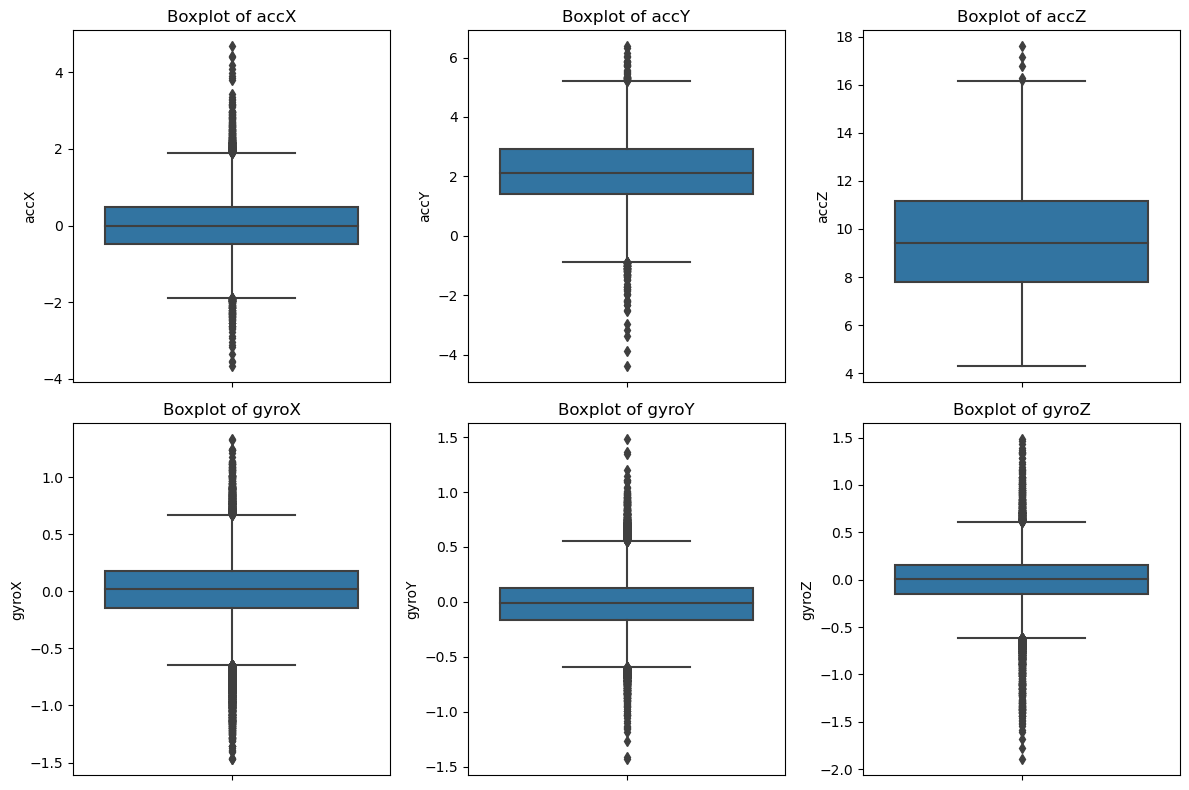

In [19]:
# Boxplot for visualization of outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

#### Among all features, accelerometer data (accX, accY) shows higher variability compared to the gyroscope data. This indicates that the accelerometer is capturing more fluctuation in movement, which could be crucial for differentiating between "standing" and "walking."
#### The presence of numerous outliers across features suggests possible measurement noise or variability in user behavior during data collection.

In [20]:
# Capping outliers at the upper and lower bounds
for column in sensor_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

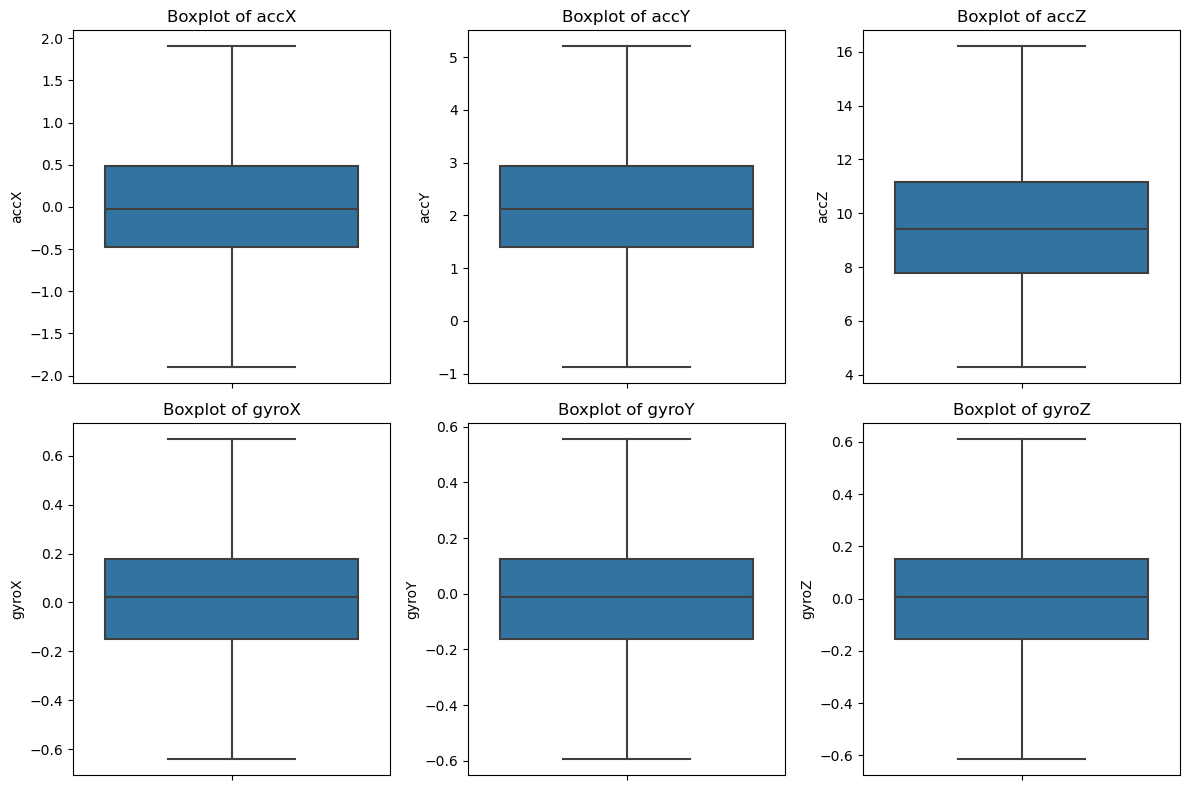

In [21]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

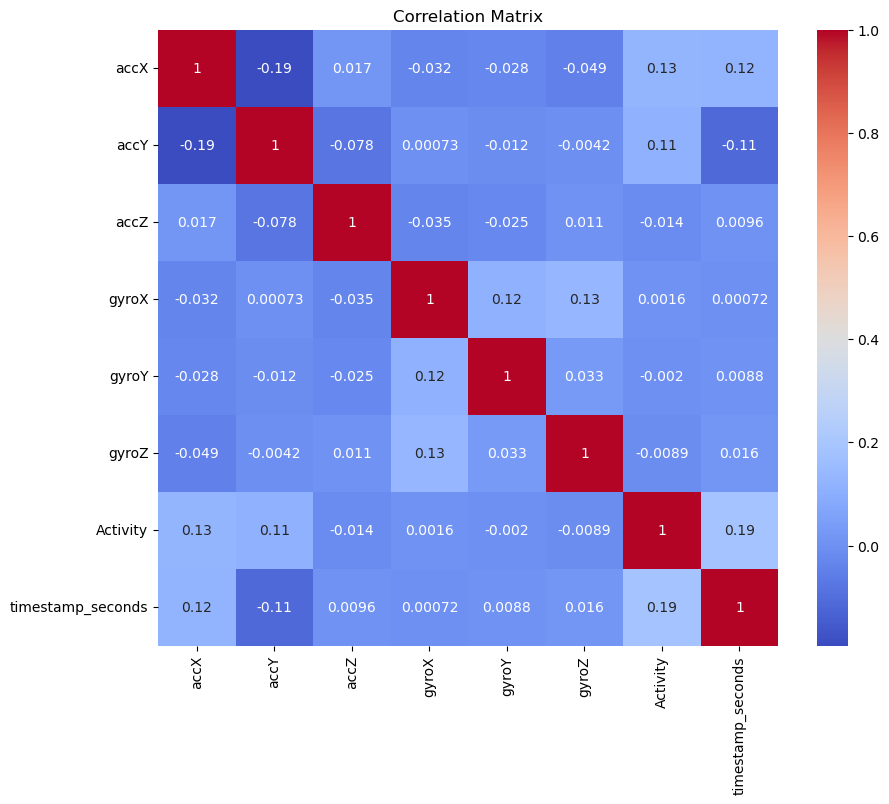

In [22]:
# Calculating and visualizing the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Accelerometer features (accX, accY, accZ) have minimal correlation with each other and with gyroscope features (gyroX, gyroY, gyroZ), indicating that these sensors capture distinct patterns in the data.
#### The target variable Activity has weak correlations with all sensor features.

#### The timestamp column is being excluded in training of the models as they don't provide direct predictive value for the classification task. Instead, timestamps serve as identifiers for the sequence of events but don't inherently capture the relationship between accelerometer and gyroscope readings needed to classify activities like standing or walking.

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalizing sensor data
scaler = StandardScaler()
sensor_data = data[sensor_columns]
data[sensor_columns] = scaler.fit_transform(sensor_data)

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data[sensor_columns]
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

smote = SMOTE(random_state=36)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
X_train_resampled.shape, y_train_resampled.shape

((43774, 6), (43774,))

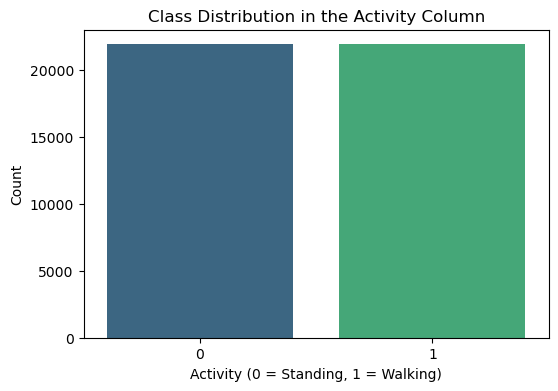

Activity
1    21887
0    21887
Name: count, dtype: int64


In [31]:
activity_counts_train = y_train_resampled.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=activity_counts_train.index, y=activity_counts_train.values, palette="viridis")
plt.title("Class Distribution in the Activity Column")
plt.xlabel("Activity (0 = Standing, 1 = Walking)")
plt.ylabel("Count")
plt.show()

print(activity_counts_train)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluation_metrics(y_pred, y):
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y, y_pred)
    print("Precision:", precision)

    recall = recall_score(y, y_pred)
    print("Recall:", recall)

    f1 = f1_score(y, y_pred)
    print("F1 Score:", f1)

    auc_roc = roc_auc_score(y, y_pred)
    print("AUC-ROC:", auc_roc)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_lr = lr.predict(X_test)
#Train set prediction
ytrain_pred_lr = lr.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_lr, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_lr, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.7967343521038308
Precision: 0.9974615898463594
Recall: 0.7951858557886889
F1 Score: 0.8849116984710206
AUC-ROC: 0.8400171703185869

***Train set prediction evaluation:***

Accuracy: 0.8637318956458172
Precision: 0.9182515498581486
Recall: 0.7985562205875634
F1 Score: 0.8542313237701914
AUC-ROC: 0.8637318956458171


In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_svm = svm.predict(X_test)
#Train set prediction
ytrain_pred_svm = svm.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_svm, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_svm, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.7694159514339544
Precision: 0.9976454293628809
Recall: 0.767174352966237
F1 Score: 0.8673610692997772
AUC-ROC: 0.832072024967967

***Train set prediction evaluation:***

Accuracy: 0.8605336501119386
Precision: 0.9430656934306569
Recall: 0.7673961712432037
F1 Score: 0.8462100410610375
AUC-ROC: 0.8605336501119386


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_knn = knn.predict(X_test)
#Train set prediction
ytrain_pred_knn = knn.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_knn, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_knn, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9302909776010048
Precision: 0.9932149722944702
Recall: 0.935456385131537
F1 Score: 0.9634708205353225
AUC-ROC: 0.7859100107475867

***Train set prediction evaluation:***

Accuracy: 0.9737743866221958
Precision: 1.0
Recall: 0.9475487732443917
F1 Score: 0.9730680805142402
AUC-ROC: 0.9737743866221958


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=36)
rf.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_rf = rf.predict(X_test)
#Train set prediction
ytrain_pred_rf = rf.predict(X_train_resampled)

In [37]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_rf, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_rf, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9650408205987021
Precision: 0.9926014579479926
Recall: 0.9716689743316647
F1 Score: 0.9820236813778255
AUC-ROC: 0.7797738811052263

***Train set prediction evaluation:***

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0


In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_xgb = xgb.predict(X_test)
#Train set prediction
ytrain_pred_xgb = xgb.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_xgb, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_xgb, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9604354197194892
Precision: 0.9935370796363238
Recall: 0.9660240707210566
F1 Score: 0.9795874284479965
AUC-ROC: 0.8042241565726495

***Train set prediction evaluation:***

Accuracy: 0.9921871430529539
Precision: 0.9998607953227229
Recall: 0.9845113537716452
F1 Score: 0.9921267093328423
AUC-ROC: 0.9921871430529539


In [39]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()
cb.fit(X_train_resampled, y_train_resampled)

#Test set prediction
y_pred_cb = cb.predict(X_test)
#Train set prediction
ytrain_pred_cb = cb.predict(X_train_resampled)

Learning rate set to 0.051729
0:	learn: 0.6273984	total: 153ms	remaining: 2m 33s
1:	learn: 0.5714699	total: 158ms	remaining: 1m 18s
2:	learn: 0.5264423	total: 170ms	remaining: 56.4s
3:	learn: 0.4878213	total: 178ms	remaining: 44.3s
4:	learn: 0.4604559	total: 184ms	remaining: 36.6s
5:	learn: 0.4299469	total: 189ms	remaining: 31.4s
6:	learn: 0.4068664	total: 194ms	remaining: 27.5s
7:	learn: 0.3853041	total: 199ms	remaining: 24.7s
8:	learn: 0.3653603	total: 203ms	remaining: 22.4s
9:	learn: 0.3492984	total: 208ms	remaining: 20.6s
10:	learn: 0.3340177	total: 213ms	remaining: 19.2s
11:	learn: 0.3228104	total: 218ms	remaining: 18s
12:	learn: 0.3103559	total: 223ms	remaining: 16.9s
13:	learn: 0.3003582	total: 227ms	remaining: 16s
14:	learn: 0.2889342	total: 231ms	remaining: 15.2s
15:	learn: 0.2811314	total: 236ms	remaining: 14.5s
16:	learn: 0.2734858	total: 240ms	remaining: 13.9s
17:	learn: 0.2667635	total: 244ms	remaining: 13.3s
18:	learn: 0.2606248	total: 249ms	remaining: 12.8s
19:	learn: 0.

190:	learn: 0.1178627	total: 1.03s	remaining: 4.35s
191:	learn: 0.1174937	total: 1.03s	remaining: 4.34s
192:	learn: 0.1172250	total: 1.04s	remaining: 4.33s
193:	learn: 0.1170142	total: 1.04s	remaining: 4.32s
194:	learn: 0.1167755	total: 1.04s	remaining: 4.31s
195:	learn: 0.1166525	total: 1.05s	remaining: 4.3s
196:	learn: 0.1163801	total: 1.05s	remaining: 4.3s
197:	learn: 0.1162022	total: 1.06s	remaining: 4.29s
198:	learn: 0.1159713	total: 1.06s	remaining: 4.28s
199:	learn: 0.1156232	total: 1.07s	remaining: 4.27s
200:	learn: 0.1153491	total: 1.07s	remaining: 4.26s
201:	learn: 0.1150962	total: 1.08s	remaining: 4.25s
202:	learn: 0.1147179	total: 1.08s	remaining: 4.25s
203:	learn: 0.1144678	total: 1.09s	remaining: 4.24s
204:	learn: 0.1141237	total: 1.09s	remaining: 4.23s
205:	learn: 0.1138549	total: 1.09s	remaining: 4.22s
206:	learn: 0.1136019	total: 1.1s	remaining: 4.22s
207:	learn: 0.1133992	total: 1.1s	remaining: 4.21s
208:	learn: 0.1131324	total: 1.11s	remaining: 4.2s
209:	learn: 0.112

369:	learn: 0.0863305	total: 1.84s	remaining: 3.13s
370:	learn: 0.0861322	total: 1.84s	remaining: 3.12s
371:	learn: 0.0860487	total: 1.85s	remaining: 3.12s
372:	learn: 0.0857850	total: 1.85s	remaining: 3.11s
373:	learn: 0.0855732	total: 1.85s	remaining: 3.1s
374:	learn: 0.0855129	total: 1.86s	remaining: 3.1s
375:	learn: 0.0853860	total: 1.86s	remaining: 3.09s
376:	learn: 0.0852760	total: 1.87s	remaining: 3.09s
377:	learn: 0.0851487	total: 1.87s	remaining: 3.08s
378:	learn: 0.0850007	total: 1.88s	remaining: 3.08s
379:	learn: 0.0849163	total: 1.88s	remaining: 3.07s
380:	learn: 0.0847323	total: 1.89s	remaining: 3.06s
381:	learn: 0.0846069	total: 1.89s	remaining: 3.06s
382:	learn: 0.0844467	total: 1.9s	remaining: 3.05s
383:	learn: 0.0843340	total: 1.9s	remaining: 3.05s
384:	learn: 0.0841793	total: 1.9s	remaining: 3.04s
385:	learn: 0.0840319	total: 1.91s	remaining: 3.04s
386:	learn: 0.0839502	total: 1.91s	remaining: 3.03s
387:	learn: 0.0836713	total: 1.92s	remaining: 3.03s
388:	learn: 0.083

553:	learn: 0.0674813	total: 2.65s	remaining: 2.13s
554:	learn: 0.0674224	total: 2.65s	remaining: 2.13s
555:	learn: 0.0673304	total: 2.65s	remaining: 2.12s
556:	learn: 0.0672471	total: 2.66s	remaining: 2.12s
557:	learn: 0.0671681	total: 2.66s	remaining: 2.11s
558:	learn: 0.0670819	total: 2.67s	remaining: 2.1s
559:	learn: 0.0670051	total: 2.67s	remaining: 2.1s
560:	learn: 0.0668853	total: 2.68s	remaining: 2.1s
561:	learn: 0.0668299	total: 2.68s	remaining: 2.09s
562:	learn: 0.0667874	total: 2.69s	remaining: 2.08s
563:	learn: 0.0667403	total: 2.69s	remaining: 2.08s
564:	learn: 0.0666220	total: 2.7s	remaining: 2.08s
565:	learn: 0.0665523	total: 2.7s	remaining: 2.07s
566:	learn: 0.0664803	total: 2.71s	remaining: 2.06s
567:	learn: 0.0664144	total: 2.71s	remaining: 2.06s
568:	learn: 0.0662352	total: 2.71s	remaining: 2.06s
569:	learn: 0.0661837	total: 2.72s	remaining: 2.05s
570:	learn: 0.0661157	total: 2.72s	remaining: 2.05s
571:	learn: 0.0660446	total: 2.73s	remaining: 2.04s
572:	learn: 0.066

737:	learn: 0.0563333	total: 3.45s	remaining: 1.23s
738:	learn: 0.0562315	total: 3.46s	remaining: 1.22s
739:	learn: 0.0561748	total: 3.46s	remaining: 1.22s
740:	learn: 0.0561156	total: 3.47s	remaining: 1.21s
741:	learn: 0.0560541	total: 3.47s	remaining: 1.21s
742:	learn: 0.0559727	total: 3.48s	remaining: 1.2s
743:	learn: 0.0559554	total: 3.48s	remaining: 1.2s
744:	learn: 0.0559207	total: 3.48s	remaining: 1.19s
745:	learn: 0.0558462	total: 3.49s	remaining: 1.19s
746:	learn: 0.0557692	total: 3.49s	remaining: 1.18s
747:	learn: 0.0556974	total: 3.5s	remaining: 1.18s
748:	learn: 0.0556444	total: 3.5s	remaining: 1.17s
749:	learn: 0.0556223	total: 3.5s	remaining: 1.17s
750:	learn: 0.0555829	total: 3.51s	remaining: 1.16s
751:	learn: 0.0555299	total: 3.51s	remaining: 1.16s
752:	learn: 0.0554918	total: 3.52s	remaining: 1.15s
753:	learn: 0.0553841	total: 3.52s	remaining: 1.15s
754:	learn: 0.0553221	total: 3.53s	remaining: 1.14s
755:	learn: 0.0552919	total: 3.53s	remaining: 1.14s
756:	learn: 0.055

927:	learn: 0.0477785	total: 4.28s	remaining: 332ms
928:	learn: 0.0477126	total: 4.28s	remaining: 327ms
929:	learn: 0.0476897	total: 4.29s	remaining: 323ms
930:	learn: 0.0476384	total: 4.3s	remaining: 319ms
931:	learn: 0.0476134	total: 4.3s	remaining: 314ms
932:	learn: 0.0475845	total: 4.31s	remaining: 309ms
933:	learn: 0.0475609	total: 4.31s	remaining: 305ms
934:	learn: 0.0474899	total: 4.32s	remaining: 300ms
935:	learn: 0.0474740	total: 4.32s	remaining: 296ms
936:	learn: 0.0474069	total: 4.33s	remaining: 291ms
937:	learn: 0.0473391	total: 4.33s	remaining: 286ms
938:	learn: 0.0472910	total: 4.33s	remaining: 282ms
939:	learn: 0.0472329	total: 4.34s	remaining: 277ms
940:	learn: 0.0472082	total: 4.34s	remaining: 272ms
941:	learn: 0.0471603	total: 4.35s	remaining: 268ms
942:	learn: 0.0471382	total: 4.35s	remaining: 263ms
943:	learn: 0.0471305	total: 4.36s	remaining: 259ms
944:	learn: 0.0470885	total: 4.36s	remaining: 254ms
945:	learn: 0.0470804	total: 4.37s	remaining: 249ms
946:	learn: 0.

In [40]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(y_pred_cb, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_pred_cb, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9578187146744819
Precision: 0.993627774115579
Recall: 0.9632548727233997
F1 Score: 0.9782056135417231
AUC-ROC: 0.805869860604124

***Train set prediction evaluation:***

Accuracy: 0.9880979576917805
Precision: 0.9998596294216732
Recall: 0.9763329830492987
F1 Score: 0.9879562634365102
AUC-ROC: 0.9880979576917805


### Key Observations:

#### 1. Random Forest Classifier gives the highest test accuracy (96.5%), followed by XGBoost (96.04%) and CatBoost (95.78%)

#### 2. Logistic Regression achieves the highest AUC-ROC score (0.84), followed by SVC (0.8321), CatBoost (0.8059) and XGBoost (0.8042). These models have better discrimination ability to distinguish between the classes (standing vs. walking).

#### XGBoost and CatBoost both perform well in terms of AUC-ROC, which indicates their ability to correctly differentiate between classes. They also perform well on the other metrics, especially in Test Accuracy and XGBoost provides the best balance of precision, recall, and F1 score.

### Overfitting Issue: 
#### Overfitting is majorly seen in models like Logistic Regression, Support Vector and KNNeighbors. CatBoost, XGBoost and Random Forest do not experience major overfitting issues and can be reduced with hyperparameter tuning. Hence, choosing XGBoost and CatBoost for Hyperparameter tuning.

### Hyperparameter Tuning:

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

gridsearch_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                               scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)

gridsearch_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Paameters for XGBoost: ", gridsearch_xgb.best_params_)
print("Best ROC-AUC score for XGBoost: ", gridsearch_xgb.best_score_)

# Getting the best model from GridSearch
best_xgb_model = gridsearch_xgb.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}
Best ROC-AUC score for XGBoost:  0.9971935987195519


In [41]:
best_xgb_model=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 10, n_estimators= 500, subsample= 0.8)

In [42]:
best_xgb_model.fit(X_train_resampled, y_train_resampled)

#Test set prediction
ytest_xgboost = best_xgb_model.predict(X_test)
#Train set prediction
ytrain_xgboost = best_xgb_model.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest_xgboost, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_xgboost, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9659828344149047
Precision: 0.9923946110386789
Recall: 0.9728405580999041
F1 Score: 0.9825203033399666
AUC-ROC: 0.77429906692874

***Train set prediction evaluation:***

Accuracy: 0.9999086215561749
Precision: 1.0
Recall: 0.9998172431123498
F1 Score: 0.9999086132053918
AUC-ROC: 0.9999086215561749


In [39]:
param_grid_catboost = {
    'iterations': [500, 1000, 1500],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 50, 100]
}

grid_search_catboost = GridSearchCV(estimator=cb, param_grid=param_grid_catboost, 
                                    scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)

grid_search_catboost.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Parameters for CatBoost: ", grid_search_catboost.best_params_)
print("Best ROC-AUC score for CatBoost: ", grid_search_catboost.best_score_)

# Getting the best model from GridSearch
best_catboost_model = grid_search_catboost.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
0:	learn: 0.6163105	total: 14.2ms	remaining: 21.2s
1:	learn: 0.5455745	total: 27ms	remaining: 20.2s
2:	learn: 0.4840723	total: 40ms	remaining: 19.9s
3:	learn: 0.4375985	total: 52.7ms	remaining: 19.7s
4:	learn: 0.3979223	total: 65.6ms	remaining: 19.6s
5:	learn: 0.3646749	total: 77.9ms	remaining: 19.4s
6:	learn: 0.3337919	total: 90.9ms	remaining: 19.4s
7:	learn: 0.3096210	total: 104ms	remaining: 19.4s
8:	learn: 0.2893831	total: 117ms	remaining: 19.3s
9:	learn: 0.2722494	total: 130ms	remaining: 19.3s
10:	learn: 0.2559322	total: 143ms	remaining: 19.3s
11:	learn: 0.2432797	total: 155ms	remaining: 19.2s
12:	learn: 0.2321328	total: 168ms	remaining: 19.2s
13:	learn: 0.2226126	total: 180ms	remaining: 19.1s
14:	learn: 0.2135225	total: 193ms	remaining: 19.1s
15:	learn: 0.2054960	total: 206ms	remaining: 19.1s
16:	learn: 0.1980354	total: 218ms	remaining: 19.1s
17:	learn: 0.1931126	total: 231ms	remaining: 19s
18:	learn: 0.1880957	total: 

175:	learn: 0.0512937	total: 1.91s	remaining: 14.4s
176:	learn: 0.0510744	total: 1.92s	remaining: 14.4s
177:	learn: 0.0507900	total: 1.93s	remaining: 14.4s
178:	learn: 0.0506068	total: 1.94s	remaining: 14.3s
179:	learn: 0.0504046	total: 1.95s	remaining: 14.3s
180:	learn: 0.0501686	total: 1.96s	remaining: 14.3s
181:	learn: 0.0500065	total: 1.97s	remaining: 14.3s
182:	learn: 0.0497036	total: 1.98s	remaining: 14.3s
183:	learn: 0.0495227	total: 1.99s	remaining: 14.2s
184:	learn: 0.0492904	total: 2s	remaining: 14.2s
185:	learn: 0.0490395	total: 2.01s	remaining: 14.2s
186:	learn: 0.0487565	total: 2.02s	remaining: 14.2s
187:	learn: 0.0486027	total: 2.03s	remaining: 14.2s
188:	learn: 0.0484425	total: 2.04s	remaining: 14.2s
189:	learn: 0.0481724	total: 2.05s	remaining: 14.1s
190:	learn: 0.0479461	total: 2.06s	remaining: 14.1s
191:	learn: 0.0477396	total: 2.07s	remaining: 14.1s
192:	learn: 0.0475492	total: 2.08s	remaining: 14.1s
193:	learn: 0.0473797	total: 2.09s	remaining: 14.1s
194:	learn: 0.0

345:	learn: 0.0261685	total: 3.58s	remaining: 11.9s
346:	learn: 0.0260709	total: 3.59s	remaining: 11.9s
347:	learn: 0.0259836	total: 3.6s	remaining: 11.9s
348:	learn: 0.0258797	total: 3.61s	remaining: 11.9s
349:	learn: 0.0258009	total: 3.62s	remaining: 11.9s
350:	learn: 0.0257056	total: 3.63s	remaining: 11.9s
351:	learn: 0.0256388	total: 3.64s	remaining: 11.9s
352:	learn: 0.0255617	total: 3.65s	remaining: 11.8s
353:	learn: 0.0254879	total: 3.66s	remaining: 11.8s
354:	learn: 0.0253890	total: 3.67s	remaining: 11.8s
355:	learn: 0.0252855	total: 3.67s	remaining: 11.8s
356:	learn: 0.0251527	total: 3.69s	remaining: 11.8s
357:	learn: 0.0250084	total: 3.69s	remaining: 11.8s
358:	learn: 0.0249324	total: 3.7s	remaining: 11.8s
359:	learn: 0.0248505	total: 3.71s	remaining: 11.8s
360:	learn: 0.0247870	total: 3.72s	remaining: 11.7s
361:	learn: 0.0247311	total: 3.73s	remaining: 11.7s
362:	learn: 0.0246122	total: 3.74s	remaining: 11.7s
363:	learn: 0.0245469	total: 3.75s	remaining: 11.7s
364:	learn: 0.

516:	learn: 0.0149107	total: 5.25s	remaining: 9.98s
517:	learn: 0.0148830	total: 5.26s	remaining: 9.97s
518:	learn: 0.0148181	total: 5.27s	remaining: 9.96s
519:	learn: 0.0147950	total: 5.28s	remaining: 9.95s
520:	learn: 0.0147665	total: 5.29s	remaining: 9.94s
521:	learn: 0.0147350	total: 5.3s	remaining: 9.93s
522:	learn: 0.0146999	total: 5.31s	remaining: 9.92s
523:	learn: 0.0146297	total: 5.32s	remaining: 9.91s
524:	learn: 0.0145586	total: 5.33s	remaining: 9.9s
525:	learn: 0.0145234	total: 5.34s	remaining: 9.89s
526:	learn: 0.0144902	total: 5.35s	remaining: 9.88s
527:	learn: 0.0144477	total: 5.36s	remaining: 9.87s
528:	learn: 0.0143770	total: 5.37s	remaining: 9.86s
529:	learn: 0.0143354	total: 5.38s	remaining: 9.85s
530:	learn: 0.0142964	total: 5.39s	remaining: 9.84s
531:	learn: 0.0142617	total: 5.4s	remaining: 9.82s
532:	learn: 0.0141833	total: 5.41s	remaining: 9.81s
533:	learn: 0.0141360	total: 5.42s	remaining: 9.8s
534:	learn: 0.0140954	total: 5.43s	remaining: 9.8s
535:	learn: 0.014

681:	learn: 0.0094327	total: 6.94s	remaining: 8.32s
682:	learn: 0.0093973	total: 6.95s	remaining: 8.31s
683:	learn: 0.0093690	total: 6.96s	remaining: 8.3s
684:	learn: 0.0093548	total: 6.96s	remaining: 8.29s
685:	learn: 0.0093409	total: 6.97s	remaining: 8.28s
686:	learn: 0.0093233	total: 6.98s	remaining: 8.27s
687:	learn: 0.0093018	total: 6.99s	remaining: 8.25s
688:	learn: 0.0092715	total: 7s	remaining: 8.24s
689:	learn: 0.0092451	total: 7.01s	remaining: 8.23s
690:	learn: 0.0092155	total: 7.02s	remaining: 8.22s
691:	learn: 0.0092003	total: 7.03s	remaining: 8.21s
692:	learn: 0.0091611	total: 7.04s	remaining: 8.2s
693:	learn: 0.0091476	total: 7.05s	remaining: 8.19s
694:	learn: 0.0091324	total: 7.06s	remaining: 8.18s
695:	learn: 0.0091142	total: 7.07s	remaining: 8.17s
696:	learn: 0.0090993	total: 7.08s	remaining: 8.16s
697:	learn: 0.0090623	total: 7.09s	remaining: 8.15s
698:	learn: 0.0090474	total: 7.1s	remaining: 8.14s
699:	learn: 0.0090364	total: 7.11s	remaining: 8.13s
700:	learn: 0.0090

852:	learn: 0.0062856	total: 8.61s	remaining: 6.53s
853:	learn: 0.0062753	total: 8.62s	remaining: 6.52s
854:	learn: 0.0062608	total: 8.63s	remaining: 6.51s
855:	learn: 0.0062509	total: 8.64s	remaining: 6.5s
856:	learn: 0.0062370	total: 8.65s	remaining: 6.49s
857:	learn: 0.0062272	total: 8.66s	remaining: 6.48s
858:	learn: 0.0062151	total: 8.67s	remaining: 6.47s
859:	learn: 0.0061966	total: 8.68s	remaining: 6.46s
860:	learn: 0.0061885	total: 8.69s	remaining: 6.45s
861:	learn: 0.0061664	total: 8.7s	remaining: 6.44s
862:	learn: 0.0061439	total: 8.71s	remaining: 6.43s
863:	learn: 0.0061364	total: 8.72s	remaining: 6.42s
864:	learn: 0.0061270	total: 8.72s	remaining: 6.41s
865:	learn: 0.0061104	total: 8.73s	remaining: 6.39s
866:	learn: 0.0060904	total: 8.74s	remaining: 6.38s
867:	learn: 0.0060781	total: 8.75s	remaining: 6.37s
868:	learn: 0.0060695	total: 8.76s	remaining: 6.36s
869:	learn: 0.0060601	total: 8.77s	remaining: 6.35s
870:	learn: 0.0060511	total: 8.78s	remaining: 6.34s
871:	learn: 0.

1027:	learn: 0.0044287	total: 10.3s	remaining: 4.74s
1028:	learn: 0.0044228	total: 10.3s	remaining: 4.73s
1029:	learn: 0.0044185	total: 10.3s	remaining: 4.72s
1030:	learn: 0.0044126	total: 10.4s	remaining: 4.71s
1031:	learn: 0.0044032	total: 10.4s	remaining: 4.7s
1032:	learn: 0.0044031	total: 10.4s	remaining: 4.69s
1033:	learn: 0.0043923	total: 10.4s	remaining: 4.68s
1034:	learn: 0.0043866	total: 10.4s	remaining: 4.67s
1035:	learn: 0.0043803	total: 10.4s	remaining: 4.66s
1036:	learn: 0.0043725	total: 10.4s	remaining: 4.65s
1037:	learn: 0.0043725	total: 10.4s	remaining: 4.63s
1038:	learn: 0.0043725	total: 10.4s	remaining: 4.62s
1039:	learn: 0.0043645	total: 10.4s	remaining: 4.61s
1040:	learn: 0.0043585	total: 10.4s	remaining: 4.6s
1041:	learn: 0.0043585	total: 10.4s	remaining: 4.59s
1042:	learn: 0.0043509	total: 10.5s	remaining: 4.58s
1043:	learn: 0.0043447	total: 10.5s	remaining: 4.57s
1044:	learn: 0.0043381	total: 10.5s	remaining: 4.56s
1045:	learn: 0.0043312	total: 10.5s	remaining: 4

1206:	learn: 0.0035874	total: 11.8s	remaining: 2.86s
1207:	learn: 0.0035874	total: 11.8s	remaining: 2.85s
1208:	learn: 0.0035874	total: 11.8s	remaining: 2.84s
1209:	learn: 0.0035874	total: 11.8s	remaining: 2.83s
1210:	learn: 0.0035818	total: 11.8s	remaining: 2.82s
1211:	learn: 0.0035818	total: 11.8s	remaining: 2.81s
1212:	learn: 0.0035705	total: 11.8s	remaining: 2.8s
1213:	learn: 0.0035705	total: 11.8s	remaining: 2.79s
1214:	learn: 0.0035705	total: 11.9s	remaining: 2.78s
1215:	learn: 0.0035705	total: 11.9s	remaining: 2.77s
1216:	learn: 0.0035704	total: 11.9s	remaining: 2.76s
1217:	learn: 0.0035704	total: 11.9s	remaining: 2.75s
1218:	learn: 0.0035642	total: 11.9s	remaining: 2.74s
1219:	learn: 0.0035642	total: 11.9s	remaining: 2.73s
1220:	learn: 0.0035600	total: 11.9s	remaining: 2.72s
1221:	learn: 0.0035600	total: 11.9s	remaining: 2.71s
1222:	learn: 0.0035600	total: 11.9s	remaining: 2.7s
1223:	learn: 0.0035600	total: 11.9s	remaining: 2.69s
1224:	learn: 0.0035600	total: 11.9s	remaining: 2

1364:	learn: 0.0034117	total: 12.8s	remaining: 1.27s
1365:	learn: 0.0034117	total: 12.8s	remaining: 1.26s
1366:	learn: 0.0034117	total: 12.8s	remaining: 1.25s
1367:	learn: 0.0034116	total: 12.8s	remaining: 1.24s
1368:	learn: 0.0034116	total: 12.8s	remaining: 1.23s
1369:	learn: 0.0034116	total: 12.8s	remaining: 1.22s
1370:	learn: 0.0034116	total: 12.8s	remaining: 1.21s
1371:	learn: 0.0034116	total: 12.9s	remaining: 1.2s
1372:	learn: 0.0034116	total: 12.9s	remaining: 1.19s
1373:	learn: 0.0034116	total: 12.9s	remaining: 1.18s
1374:	learn: 0.0034116	total: 12.9s	remaining: 1.17s
1375:	learn: 0.0034116	total: 12.9s	remaining: 1.16s
1376:	learn: 0.0034116	total: 12.9s	remaining: 1.15s
1377:	learn: 0.0034116	total: 12.9s	remaining: 1.14s
1378:	learn: 0.0034116	total: 12.9s	remaining: 1.13s
1379:	learn: 0.0034116	total: 12.9s	remaining: 1.12s
1380:	learn: 0.0034116	total: 12.9s	remaining: 1.11s
1381:	learn: 0.0034115	total: 12.9s	remaining: 1.1s
1382:	learn: 0.0034115	total: 12.9s	remaining: 1

In [43]:
best_catboost_model=CatBoostClassifier(border_count= 50, depth= 10, iterations= 1500, l2_leaf_reg= 1, learning_rate= 0.05)

In [44]:
best_catboost_model.fit(X_train_resampled, y_train_resampled)

#Test set prediction
ytest_catboost = best_catboost_model.predict(X_test)
#Train set prediction
ytrain_catboost = best_catboost_model.predict(X_train_resampled)

0:	learn: 0.6163105	total: 12.4ms	remaining: 18.6s
1:	learn: 0.5455745	total: 23.2ms	remaining: 17.4s
2:	learn: 0.4840723	total: 34.4ms	remaining: 17.1s
3:	learn: 0.4375985	total: 45ms	remaining: 16.8s
4:	learn: 0.3979223	total: 56.3ms	remaining: 16.8s
5:	learn: 0.3646749	total: 66.9ms	remaining: 16.7s
6:	learn: 0.3337919	total: 77.9ms	remaining: 16.6s
7:	learn: 0.3096210	total: 88.9ms	remaining: 16.6s
8:	learn: 0.2893831	total: 99.5ms	remaining: 16.5s
9:	learn: 0.2722494	total: 110ms	remaining: 16.5s
10:	learn: 0.2559322	total: 121ms	remaining: 16.4s
11:	learn: 0.2432797	total: 132ms	remaining: 16.3s
12:	learn: 0.2321328	total: 142ms	remaining: 16.3s
13:	learn: 0.2226126	total: 153ms	remaining: 16.2s
14:	learn: 0.2135225	total: 163ms	remaining: 16.2s
15:	learn: 0.2054960	total: 174ms	remaining: 16.1s
16:	learn: 0.1980354	total: 185ms	remaining: 16.1s
17:	learn: 0.1931126	total: 195ms	remaining: 16s
18:	learn: 0.1880957	total: 205ms	remaining: 16s
19:	learn: 0.1828525	total: 215ms	rema

169:	learn: 0.0528306	total: 1.7s	remaining: 13.3s
170:	learn: 0.0526510	total: 1.71s	remaining: 13.3s
171:	learn: 0.0524126	total: 1.72s	remaining: 13.3s
172:	learn: 0.0521161	total: 1.73s	remaining: 13.3s
173:	learn: 0.0518622	total: 1.74s	remaining: 13.3s
174:	learn: 0.0516217	total: 1.75s	remaining: 13.2s
175:	learn: 0.0512937	total: 1.76s	remaining: 13.2s
176:	learn: 0.0510744	total: 1.77s	remaining: 13.2s
177:	learn: 0.0507900	total: 1.78s	remaining: 13.2s
178:	learn: 0.0506068	total: 1.79s	remaining: 13.2s
179:	learn: 0.0504046	total: 1.8s	remaining: 13.2s
180:	learn: 0.0501686	total: 1.81s	remaining: 13.2s
181:	learn: 0.0500065	total: 1.82s	remaining: 13.2s
182:	learn: 0.0497036	total: 1.82s	remaining: 13.1s
183:	learn: 0.0495227	total: 1.83s	remaining: 13.1s
184:	learn: 0.0492904	total: 1.84s	remaining: 13.1s
185:	learn: 0.0490395	total: 1.85s	remaining: 13.1s
186:	learn: 0.0487565	total: 1.86s	remaining: 13.1s
187:	learn: 0.0486027	total: 1.87s	remaining: 13.1s
188:	learn: 0.

341:	learn: 0.0266225	total: 3.36s	remaining: 11.4s
342:	learn: 0.0265604	total: 3.37s	remaining: 11.4s
343:	learn: 0.0264678	total: 3.38s	remaining: 11.3s
344:	learn: 0.0262700	total: 3.39s	remaining: 11.3s
345:	learn: 0.0261685	total: 3.4s	remaining: 11.3s
346:	learn: 0.0260709	total: 3.4s	remaining: 11.3s
347:	learn: 0.0259836	total: 3.42s	remaining: 11.3s
348:	learn: 0.0258797	total: 3.42s	remaining: 11.3s
349:	learn: 0.0258009	total: 3.43s	remaining: 11.3s
350:	learn: 0.0257056	total: 3.44s	remaining: 11.3s
351:	learn: 0.0256388	total: 3.45s	remaining: 11.3s
352:	learn: 0.0255617	total: 3.46s	remaining: 11.3s
353:	learn: 0.0254879	total: 3.47s	remaining: 11.2s
354:	learn: 0.0253890	total: 3.48s	remaining: 11.2s
355:	learn: 0.0252855	total: 3.49s	remaining: 11.2s
356:	learn: 0.0251527	total: 3.5s	remaining: 11.2s
357:	learn: 0.0250084	total: 3.51s	remaining: 11.2s
358:	learn: 0.0249324	total: 3.52s	remaining: 11.2s
359:	learn: 0.0248505	total: 3.53s	remaining: 11.2s
360:	learn: 0.0

518:	learn: 0.0148181	total: 5.03s	remaining: 9.51s
519:	learn: 0.0147950	total: 5.04s	remaining: 9.5s
520:	learn: 0.0147665	total: 5.05s	remaining: 9.49s
521:	learn: 0.0147350	total: 5.06s	remaining: 9.48s
522:	learn: 0.0146999	total: 5.07s	remaining: 9.47s
523:	learn: 0.0146297	total: 5.08s	remaining: 9.46s
524:	learn: 0.0145586	total: 5.09s	remaining: 9.45s
525:	learn: 0.0145234	total: 5.09s	remaining: 9.44s
526:	learn: 0.0144902	total: 5.1s	remaining: 9.42s
527:	learn: 0.0144477	total: 5.11s	remaining: 9.41s
528:	learn: 0.0143770	total: 5.12s	remaining: 9.4s
529:	learn: 0.0143354	total: 5.13s	remaining: 9.39s
530:	learn: 0.0142964	total: 5.14s	remaining: 9.38s
531:	learn: 0.0142617	total: 5.15s	remaining: 9.37s
532:	learn: 0.0141833	total: 5.16s	remaining: 9.36s
533:	learn: 0.0141360	total: 5.17s	remaining: 9.35s
534:	learn: 0.0140954	total: 5.18s	remaining: 9.34s
535:	learn: 0.0140454	total: 5.19s	remaining: 9.33s
536:	learn: 0.0140059	total: 5.2s	remaining: 9.32s
537:	learn: 0.01

695:	learn: 0.0091142	total: 6.7s	remaining: 7.74s
696:	learn: 0.0090993	total: 6.71s	remaining: 7.73s
697:	learn: 0.0090623	total: 6.72s	remaining: 7.72s
698:	learn: 0.0090474	total: 6.73s	remaining: 7.71s
699:	learn: 0.0090364	total: 6.74s	remaining: 7.7s
700:	learn: 0.0090249	total: 6.75s	remaining: 7.69s
701:	learn: 0.0090015	total: 6.75s	remaining: 7.68s
702:	learn: 0.0089851	total: 6.76s	remaining: 7.67s
703:	learn: 0.0089578	total: 6.77s	remaining: 7.66s
704:	learn: 0.0089404	total: 6.78s	remaining: 7.65s
705:	learn: 0.0089143	total: 6.79s	remaining: 7.64s
706:	learn: 0.0088796	total: 6.8s	remaining: 7.63s
707:	learn: 0.0088523	total: 6.81s	remaining: 7.62s
708:	learn: 0.0088333	total: 6.82s	remaining: 7.61s
709:	learn: 0.0088150	total: 6.83s	remaining: 7.6s
710:	learn: 0.0087839	total: 6.84s	remaining: 7.59s
711:	learn: 0.0087519	total: 6.85s	remaining: 7.58s
712:	learn: 0.0087387	total: 6.86s	remaining: 7.57s
713:	learn: 0.0087218	total: 6.87s	remaining: 7.56s
714:	learn: 0.00

873:	learn: 0.0059997	total: 8.37s	remaining: 5.99s
874:	learn: 0.0059997	total: 8.37s	remaining: 5.98s
875:	learn: 0.0059855	total: 8.38s	remaining: 5.97s
876:	learn: 0.0059764	total: 8.39s	remaining: 5.96s
877:	learn: 0.0059601	total: 8.4s	remaining: 5.95s
878:	learn: 0.0059530	total: 8.41s	remaining: 5.94s
879:	learn: 0.0059459	total: 8.42s	remaining: 5.93s
880:	learn: 0.0059331	total: 8.43s	remaining: 5.92s
881:	learn: 0.0059202	total: 8.44s	remaining: 5.92s
882:	learn: 0.0059074	total: 8.45s	remaining: 5.91s
883:	learn: 0.0058951	total: 8.46s	remaining: 5.89s
884:	learn: 0.0058803	total: 8.47s	remaining: 5.88s
885:	learn: 0.0058727	total: 8.48s	remaining: 5.88s
886:	learn: 0.0058527	total: 8.49s	remaining: 5.87s
887:	learn: 0.0058465	total: 8.5s	remaining: 5.86s
888:	learn: 0.0058340	total: 8.51s	remaining: 5.85s
889:	learn: 0.0058219	total: 8.52s	remaining: 5.84s
890:	learn: 0.0058007	total: 8.53s	remaining: 5.83s
891:	learn: 0.0057919	total: 8.53s	remaining: 5.82s
892:	learn: 0.

1040:	learn: 0.0043585	total: 9.84s	remaining: 4.34s
1041:	learn: 0.0043585	total: 9.84s	remaining: 4.33s
1042:	learn: 0.0043509	total: 9.85s	remaining: 4.32s
1043:	learn: 0.0043447	total: 9.86s	remaining: 4.31s
1044:	learn: 0.0043381	total: 9.87s	remaining: 4.3s
1045:	learn: 0.0043312	total: 9.88s	remaining: 4.29s
1046:	learn: 0.0043238	total: 9.89s	remaining: 4.28s
1047:	learn: 0.0043121	total: 9.9s	remaining: 4.27s
1048:	learn: 0.0043121	total: 9.9s	remaining: 4.26s
1049:	learn: 0.0043059	total: 9.91s	remaining: 4.25s
1050:	learn: 0.0042924	total: 9.92s	remaining: 4.24s
1051:	learn: 0.0042924	total: 9.93s	remaining: 4.23s
1052:	learn: 0.0042923	total: 9.93s	remaining: 4.21s
1053:	learn: 0.0042923	total: 9.94s	remaining: 4.2s
1054:	learn: 0.0042923	total: 9.94s	remaining: 4.19s
1055:	learn: 0.0042875	total: 9.95s	remaining: 4.18s
1056:	learn: 0.0042875	total: 9.96s	remaining: 4.17s
1057:	learn: 0.0042808	total: 9.97s	remaining: 4.16s
1058:	learn: 0.0042719	total: 9.97s	remaining: 4.1

1198:	learn: 0.0035875	total: 11.1s	remaining: 2.78s
1199:	learn: 0.0035875	total: 11.1s	remaining: 2.77s
1200:	learn: 0.0035875	total: 11.1s	remaining: 2.76s
1201:	learn: 0.0035875	total: 11.1s	remaining: 2.75s
1202:	learn: 0.0035875	total: 11.1s	remaining: 2.74s
1203:	learn: 0.0035875	total: 11.1s	remaining: 2.73s
1204:	learn: 0.0035875	total: 11.1s	remaining: 2.72s
1205:	learn: 0.0035874	total: 11.1s	remaining: 2.71s
1206:	learn: 0.0035874	total: 11.1s	remaining: 2.7s
1207:	learn: 0.0035874	total: 11.1s	remaining: 2.69s
1208:	learn: 0.0035874	total: 11.2s	remaining: 2.68s
1209:	learn: 0.0035874	total: 11.2s	remaining: 2.67s
1210:	learn: 0.0035818	total: 11.2s	remaining: 2.66s
1211:	learn: 0.0035818	total: 11.2s	remaining: 2.65s
1212:	learn: 0.0035705	total: 11.2s	remaining: 2.65s
1213:	learn: 0.0035705	total: 11.2s	remaining: 2.63s
1214:	learn: 0.0035705	total: 11.2s	remaining: 2.63s
1215:	learn: 0.0035705	total: 11.2s	remaining: 2.62s
1216:	learn: 0.0035704	total: 11.2s	remaining: 

1362:	learn: 0.0034117	total: 12.1s	remaining: 1.22s
1363:	learn: 0.0034117	total: 12.1s	remaining: 1.21s
1364:	learn: 0.0034117	total: 12.1s	remaining: 1.2s
1365:	learn: 0.0034117	total: 12.1s	remaining: 1.19s
1366:	learn: 0.0034117	total: 12.1s	remaining: 1.18s
1367:	learn: 0.0034116	total: 12.1s	remaining: 1.17s
1368:	learn: 0.0034116	total: 12.1s	remaining: 1.16s
1369:	learn: 0.0034116	total: 12.2s	remaining: 1.15s
1370:	learn: 0.0034116	total: 12.2s	remaining: 1.14s
1371:	learn: 0.0034116	total: 12.2s	remaining: 1.13s
1372:	learn: 0.0034116	total: 12.2s	remaining: 1.13s
1373:	learn: 0.0034116	total: 12.2s	remaining: 1.12s
1374:	learn: 0.0034116	total: 12.2s	remaining: 1.11s
1375:	learn: 0.0034116	total: 12.2s	remaining: 1.1s
1376:	learn: 0.0034116	total: 12.2s	remaining: 1.09s
1377:	learn: 0.0034116	total: 12.2s	remaining: 1.08s
1378:	learn: 0.0034116	total: 12.2s	remaining: 1.07s
1379:	learn: 0.0034116	total: 12.2s	remaining: 1.06s
1380:	learn: 0.0034116	total: 12.2s	remaining: 1

In [45]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest_catboost, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_catboost, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9673435210383086
Precision: 0.9918716809363823
Recall: 0.974757695175205
F1 Score: 0.9832402234636871
AUC-ROC: 0.7601061203148751

***Train set prediction evaluation:***

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# For XGBoost
print("XGBoost Model Evaluation:")
print(classification_report(y_test, ytest_xgboost))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, ytest_xgboost))

# For CatBoost
print("CatBoost Model Evaluation:")
print(classification_report(y_test, ytest_catboost))
print("Confusion Matrix for CatBoost:")
print(confusion_matrix(y_test, ytest_catboost))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.27      0.58      0.37       165
           1       0.99      0.97      0.98      9389

    accuracy                           0.97      9554
   macro avg       0.63      0.77      0.68      9554
weighted avg       0.98      0.97      0.97      9554

Confusion Matrix for XGBoost:
[[  95   70]
 [ 255 9134]]
CatBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.28      0.55      0.37       165
           1       0.99      0.97      0.98      9389

    accuracy                           0.97      9554
   macro avg       0.63      0.76      0.67      9554
weighted avg       0.98      0.97      0.97      9554

Confusion Matrix for CatBoost:
[[  90   75]
 [ 237 9152]]


### Key Observations:
#### Hyperparameter tuning increased test accuracy by a small margin but didn't help increase AUC score. Hence, going forward with regularization of both these models.

### Regularization:

#### 1. XGBoost:

In [43]:
param_grid_xgb_reg = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'n_estimators': [500],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 2, 5],  # L2 regularization
    'min_child_weight': [1, 3, 5]  # Minimum sum of weights
}

grid_search_xgb_reg = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb_reg, 
                                   scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_search_xgb_reg.fit(X_train_resampled, y_train_resampled)

print("Best Parameters (XGBoost):", grid_search_xgb_reg.best_params_)
print("Best ROC-AUC (XGBoost):", grid_search_xgb_reg.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}
Best ROC-AUC (XGBoost): 0.9965717622252313


In [47]:
final_xgb_model=XGBClassifier(random_state=36, colsample_bytree=0.8, learning_rate= 0.1, 
                              max_depth= 7, min_child_weight= 1, n_estimators= 500, reg_alpha= 0.1, reg_lambda= 2, subsample= 0.8)
final_xgb_model.fit(X_train_resampled, y_train_resampled)

#Test set prediction
ytest_xgboost = final_xgb_model.predict(X_test)
#Train set prediction
ytrain_xgboost = final_xgb_model.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest_xgboost, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_xgboost, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9644128113879004
Precision: 0.9929186185859026
Recall: 0.9707104057940142
F1 Score: 0.9816889271865575
AUC-ROC: 0.7883855059273102

***Train set prediction evaluation:***

Accuracy: 0.9994288847260931
Precision: 1.0
Recall: 0.9988577694521862
F1 Score: 0.9994285583670485
AUC-ROC: 0.999428884726093


#### 2. CatBoost:

In [46]:
param_grid_catboost_reg = {
    'iterations': [1000],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 10]  # L2 regularization
}

grid_search_catboost_reg = GridSearchCV(estimator=cb, param_grid=param_grid_catboost_reg, 
                                        scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_search_catboost_reg.fit(X_train_resampled, y_train_resampled)

print("Best Parameters (CatBoost):", grid_search_catboost_reg.best_params_)
print("Best ROC-AUC (CatBoost):", grid_search_catboost_reg.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0:	learn: 0.5577058	total: 8.88ms	remaining: 8.88s
1:	learn: 0.4579657	total: 17.4ms	remaining: 8.7s
2:	learn: 0.3905228	total: 25.4ms	remaining: 8.43s
3:	learn: 0.3412972	total: 34.2ms	remaining: 8.52s
4:	learn: 0.3026549	total: 42.6ms	remaining: 8.48s
5:	learn: 0.2746035	total: 51.8ms	remaining: 8.58s
6:	learn: 0.2539439	total: 60ms	remaining: 8.51s
7:	learn: 0.2365639	total: 68.8ms	remaining: 8.53s
8:	learn: 0.2238032	total: 76.8ms	remaining: 8.45s
9:	learn: 0.2126029	total: 85.5ms	remaining: 8.46s
10:	learn: 0.2031267	total: 94.1ms	remaining: 8.46s
11:	learn: 0.1969023	total: 103ms	remaining: 8.44s
12:	learn: 0.1909584	total: 110ms	remaining: 8.39s
13:	learn: 0.1857733	total: 119ms	remaining: 8.38s
14:	learn: 0.1812279	total: 127ms	remaining: 8.34s
15:	learn: 0.1766362	total: 135ms	remaining: 8.31s
16:	learn: 0.1721066	total: 143ms	remaining: 8.29s
17:	learn: 0.1683364	total: 151ms	remaining: 8.24s
18:	learn: 0.1646009	to

170:	learn: 0.0538362	total: 1.26s	remaining: 6.12s
171:	learn: 0.0536653	total: 1.27s	remaining: 6.12s
172:	learn: 0.0535077	total: 1.28s	remaining: 6.11s
173:	learn: 0.0533187	total: 1.28s	remaining: 6.1s
174:	learn: 0.0531375	total: 1.29s	remaining: 6.09s
175:	learn: 0.0528719	total: 1.3s	remaining: 6.09s
176:	learn: 0.0525737	total: 1.31s	remaining: 6.08s
177:	learn: 0.0522729	total: 1.31s	remaining: 6.07s
178:	learn: 0.0520592	total: 1.32s	remaining: 6.07s
179:	learn: 0.0519605	total: 1.33s	remaining: 6.06s
180:	learn: 0.0517241	total: 1.34s	remaining: 6.05s
181:	learn: 0.0516105	total: 1.34s	remaining: 6.04s
182:	learn: 0.0514461	total: 1.35s	remaining: 6.04s
183:	learn: 0.0511404	total: 1.36s	remaining: 6.03s
184:	learn: 0.0509315	total: 1.37s	remaining: 6.02s
185:	learn: 0.0508457	total: 1.37s	remaining: 6.01s
186:	learn: 0.0505571	total: 1.38s	remaining: 6.01s
187:	learn: 0.0503512	total: 1.39s	remaining: 6s
188:	learn: 0.0501239	total: 1.4s	remaining: 6s
189:	learn: 0.0500027

340:	learn: 0.0286271	total: 2.49s	remaining: 4.82s
341:	learn: 0.0285251	total: 2.5s	remaining: 4.81s
342:	learn: 0.0284949	total: 2.5s	remaining: 4.8s
343:	learn: 0.0283923	total: 2.51s	remaining: 4.79s
344:	learn: 0.0283386	total: 2.52s	remaining: 4.78s
345:	learn: 0.0282633	total: 2.53s	remaining: 4.78s
346:	learn: 0.0281792	total: 2.53s	remaining: 4.77s
347:	learn: 0.0280962	total: 2.54s	remaining: 4.76s
348:	learn: 0.0280336	total: 2.55s	remaining: 4.75s
349:	learn: 0.0279792	total: 2.55s	remaining: 4.74s
350:	learn: 0.0279105	total: 2.56s	remaining: 4.73s
351:	learn: 0.0278532	total: 2.57s	remaining: 4.73s
352:	learn: 0.0277291	total: 2.57s	remaining: 4.72s
353:	learn: 0.0276465	total: 2.58s	remaining: 4.71s
354:	learn: 0.0276076	total: 2.59s	remaining: 4.7s
355:	learn: 0.0274738	total: 2.6s	remaining: 4.69s
356:	learn: 0.0273310	total: 2.6s	remaining: 4.69s
357:	learn: 0.0272272	total: 2.61s	remaining: 4.68s
358:	learn: 0.0271553	total: 2.62s	remaining: 4.67s
359:	learn: 0.0270

514:	learn: 0.0170647	total: 3.72s	remaining: 3.5s
515:	learn: 0.0170204	total: 3.73s	remaining: 3.5s
516:	learn: 0.0169808	total: 3.73s	remaining: 3.49s
517:	learn: 0.0169459	total: 3.74s	remaining: 3.48s
518:	learn: 0.0168717	total: 3.75s	remaining: 3.47s
519:	learn: 0.0168075	total: 3.75s	remaining: 3.47s
520:	learn: 0.0167790	total: 3.76s	remaining: 3.46s
521:	learn: 0.0167441	total: 3.77s	remaining: 3.45s
522:	learn: 0.0166909	total: 3.77s	remaining: 3.44s
523:	learn: 0.0166243	total: 3.78s	remaining: 3.44s
524:	learn: 0.0165793	total: 3.79s	remaining: 3.43s
525:	learn: 0.0165385	total: 3.8s	remaining: 3.42s
526:	learn: 0.0165013	total: 3.8s	remaining: 3.41s
527:	learn: 0.0164521	total: 3.81s	remaining: 3.4s
528:	learn: 0.0163780	total: 3.82s	remaining: 3.4s
529:	learn: 0.0163502	total: 3.82s	remaining: 3.39s
530:	learn: 0.0163058	total: 3.83s	remaining: 3.38s
531:	learn: 0.0162700	total: 3.84s	remaining: 3.38s
532:	learn: 0.0162180	total: 3.84s	remaining: 3.37s
533:	learn: 0.0161

694:	learn: 0.0107813	total: 4.97s	remaining: 2.18s
695:	learn: 0.0107381	total: 4.98s	remaining: 2.18s
696:	learn: 0.0107195	total: 4.99s	remaining: 2.17s
697:	learn: 0.0106740	total: 5s	remaining: 2.16s
698:	learn: 0.0106532	total: 5.01s	remaining: 2.16s
699:	learn: 0.0106292	total: 5.02s	remaining: 2.15s
700:	learn: 0.0106132	total: 5.03s	remaining: 2.14s
701:	learn: 0.0105981	total: 5.03s	remaining: 2.14s
702:	learn: 0.0105823	total: 5.04s	remaining: 2.13s
703:	learn: 0.0105582	total: 5.05s	remaining: 2.12s
704:	learn: 0.0105418	total: 5.05s	remaining: 2.11s
705:	learn: 0.0105140	total: 5.06s	remaining: 2.11s
706:	learn: 0.0104907	total: 5.07s	remaining: 2.1s
707:	learn: 0.0104708	total: 5.07s	remaining: 2.09s
708:	learn: 0.0104490	total: 5.08s	remaining: 2.08s
709:	learn: 0.0104111	total: 5.09s	remaining: 2.08s
710:	learn: 0.0103954	total: 5.09s	remaining: 2.07s
711:	learn: 0.0103689	total: 5.1s	remaining: 2.06s
712:	learn: 0.0103405	total: 5.11s	remaining: 2.06s
713:	learn: 0.010

869:	learn: 0.0072032	total: 6.2s	remaining: 927ms
870:	learn: 0.0071915	total: 6.21s	remaining: 920ms
871:	learn: 0.0071781	total: 6.22s	remaining: 913ms
872:	learn: 0.0071509	total: 6.22s	remaining: 906ms
873:	learn: 0.0071367	total: 6.23s	remaining: 899ms
874:	learn: 0.0071258	total: 6.24s	remaining: 891ms
875:	learn: 0.0071183	total: 6.25s	remaining: 884ms
876:	learn: 0.0071013	total: 6.25s	remaining: 877ms
877:	learn: 0.0070777	total: 6.26s	remaining: 870ms
878:	learn: 0.0070616	total: 6.27s	remaining: 863ms
879:	learn: 0.0070482	total: 6.27s	remaining: 855ms
880:	learn: 0.0070373	total: 6.28s	remaining: 848ms
881:	learn: 0.0070258	total: 6.29s	remaining: 841ms
882:	learn: 0.0070145	total: 6.29s	remaining: 834ms
883:	learn: 0.0070014	total: 6.3s	remaining: 827ms
884:	learn: 0.0069792	total: 6.31s	remaining: 820ms
885:	learn: 0.0069569	total: 6.31s	remaining: 813ms
886:	learn: 0.0069465	total: 6.32s	remaining: 805ms
887:	learn: 0.0069334	total: 6.33s	remaining: 798ms
888:	learn: 0.

In [48]:
final_catboost_model=CatBoostClassifier(silent=True, depth= 8, iterations= 1000, l2_leaf_reg= 1, learning_rate= 0.1)
final_catboost_model.fit(X_train_resampled, y_train_resampled)

#Test set prediction
ytest_catboost = final_catboost_model.predict(X_test)
#Train set prediction
ytrain_catboost = final_catboost_model.predict(X_train_resampled)

In [49]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest_catboost, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_catboost, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9643081431861
Precision: 0.9921671018276762
Recall: 0.9713494514857812
F1 Score: 0.981647919918196
AUC-ROC: 0.7674929075610726

***Train set prediction evaluation:***

Accuracy: 0.9999314661671311
Precision: 1.0
Recall: 0.9998629323342624
F1 Score: 0.999931461469923
AUC-ROC: 0.9999314661671312


### Manual Tuning of XGBoost:

In [50]:
final_xgb_model=XGBClassifier(random_state=36, colsample_bytree=0.8, learning_rate= 0.05, 
                              max_depth= 7, min_child_weight= 1, n_estimators= 350, reg_alpha= 1, reg_lambda= 2)
final_xgb_model.fit(X_train_resampled, y_train_resampled)

#Test set prediction
ytest_xgboost = final_xgb_model.predict(X_test)
#Train set prediction
ytrain_xgboost = final_xgb_model.predict(X_train_resampled)

print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest_xgboost, y_test)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain_xgboost, y_train_resampled)

***Test set prediction evaluation:***

Accuracy: 0.9562486916474775
Precision: 0.9947060769824638
Recall: 0.9605921823410374
F1 Score: 0.9773515387949717
AUC-ROC: 0.8348415457159734

***Train set prediction evaluation:***

Accuracy: 0.9845113537716452
Precision: 0.9997643621282812
Recall: 0.9692511536528533
F1 Score: 0.9842713311371967
AUC-ROC: 0.9845113537716453


In [51]:
print("XGBoost Model Evaluation:")
print(classification_report(y_test, ytest_xgboost))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, ytest_xgboost))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.24      0.71      0.36       165
           1       0.99      0.96      0.98      9389

    accuracy                           0.96      9554
   macro avg       0.62      0.83      0.67      9554
weighted avg       0.98      0.96      0.97      9554

Confusion Matrix for XGBoost:
[[ 117   48]
 [ 370 9019]]


In [52]:
TN, FP, FN, TP = confusion_matrix(y_test, ytest_xgboost).ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 117
False Positives (FP): 48
False Negatives (FN): 370
True Positives (TP): 9019


### Observation:
#### After Regularization, we observe that  there is a drop in AUC-ROC before tuning these models and it suggests that the model's ability to discriminate between classes (standing vs walking) may have reduced slightly as a trade-off for reducing overfitting.
#### We also observe that with better test accuracy and AUC-ROC, XGBoost takes an upper hand between the models. Upon manually tuning XGBoost, we were able to reduce overfitting to a great extent while maintaining a good AUC-ROC score.

In [53]:
from sklearn.model_selection import cross_val_score

xgboost_cv_scores = cross_val_score(final_xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print(f"XGBoost CV ROC-AUC: {xgboost_cv_scores.mean():.4f} ± {xgboost_cv_scores.std():.4f}")

XGBoost CV ROC-AUC: 0.9943 ± 0.0008


#### The XGBoost model demonstrates excellent performance during cross-validation, with a high mean ROC-AUC score of 0.9943 and a low standard deviation of 0.0008, indicating consistent and reliable classification across the folds. This suggests the model is well-suited for distinguishing between the target classes with minimal variability.

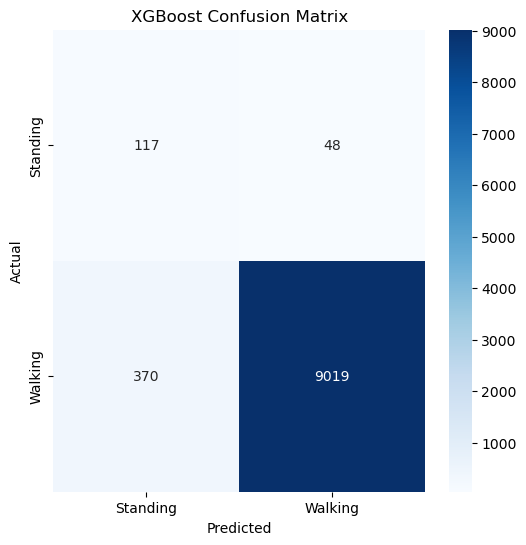

In [54]:
xgboost_cm = confusion_matrix(y_test, ytest_xgboost)

plt.figure(figsize=(6, 6))
sns.heatmap(xgboost_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Standing', 'Walking'], 
            yticklabels=['Standing', 'Walking'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Key Insights:
#### 1. True Positives (Walking classified correctly): The model correctly identified 9019 instances of the "Walking" class, which shows strong performance in identifying this dominant class.
#### 2. False Negatives (Walking misclassified as Standing): There are 370 instances where "Walking" was misclassified as "Standing" .
#### 3. The imbalance in the dataset is reflected in the higher True Positive (TP) rate for "Walking."

### Conclusion:
#### This project successfully developed and evaluated machine learning models to classify human activities as 'Standing' or 'Walking' using accelerometer and gyroscope data. After rigorous experimentation, the **XGBoost model** emerged as the optimal choice, achieving a test set accuracy of 95.62% and an AUC-ROC of 0.8348, demonstrating robust performance with reduced overfitting. While the model performs well overall, class imbalance affects minority class detection (standing) to a good extent.